## Template for Exercise 2: Integration

This is a template for doing Exercise 2 of the MASD 2018 Exam. Please fill out the fields and function templates below, reading the data as below, in order to perform the exercise. Feel free to load extra functions, but note that built-in functions for doing the entire task are, as a general rule, not allowed.

If you are unsure how to interpret the template, or what you are allowed to do, please contact us either by email or using the Absalon forum.

In [174]:
# Importing packages -- feel free to add more, but recall that you should not use built-in 
# functions for the task at hand. If in doubt, ask us by email.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import numpy.linalg as linalg
plt.rcParams['figure.dpi']=100

**Exercise 2b: Numerical integration** 

In the cell below, please implement a numerical approximation of the integral 

$g(x) = \int_1^x \frac{1}{x} dx$

with variable step length $s$. Use your numerical approximation to compute values of the function
for $100$ evenly sampled values of $x$ between $x=1$ and $x=10$. Please plot your numerical approximation together with the known solution 

$\tilde{g}(x) = \ln x$ 

for step sizes $s=1, s=0.1$ and $s=0.01$.

Number of evenly samples values at step length 0.01: 900
Number of evenly samples values at step length 0.1: 90
Number of evenly samples values at step length 1: 9


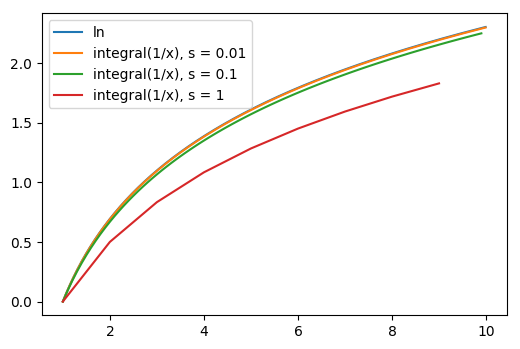

In [241]:
def integrate(x, s):
    values = np.arange(1.0, x, s)
    print("Number of evenly samples values at step length {}: {}".format(s,len(values)))
    retVal = [0]*len(values)
    for i in range(1, len(values)):
        if (i>0):
            retVal[i] = retVal[i-1] + s/values[i]
        else:
            retVal[i] = 0
    return retVal

x = 10
samples = np.arange(1.0, x, 0.01)
plt.plot(samples, np.log(samples), label='ln')

# Note that the number of samples values is variable depending on step size
# to keep a correct calculation for smaller step sizes
# Note that when s = 0.01, it covers up ln(x) almost completely
s = 0.01
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='integral(1/x), s = {}'.format(s))
s = 0.1
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='integral(1/x), s = {}'.format(s))
s = 1
plt.plot(np.arange(1.0,x,s),integrate(x, s), label='integral(1/x), s = {}'.format(s))

plt.legend()

**Exercise 2c: Numerical solution of differential equations through Euler's method**

Below, we load the tangential directions as a numpy array and use the function plot_tangents to visualize them.

We also visualize the initial starting point $\mathbf{x} = [28,20]^T$ with a black dot.

Text(0.5,1,'Tangential directions')

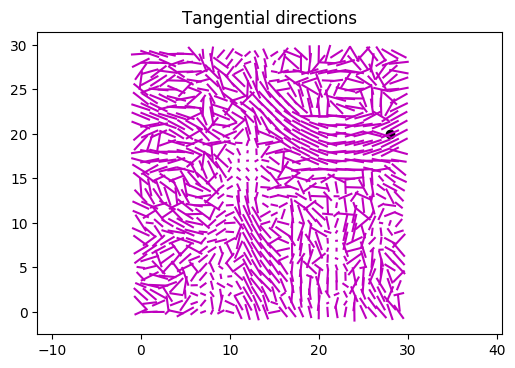

In [176]:
tangents = np.load('E2.npy')

def plot_tangents(tangents):
    ylen, xlen, d = tangents.shape
    
    for i in range(ylen):
        for j in range(xlen):
            vec = tangents[i,j]                                    
            xs = np.array([i-vec[0], i+vec[0]])
            ys = np.array([-vec[1], vec[1]]) + j
            plt.plot(xs,ys, 'm')
            
plot_tangents(tangents)       
plt.scatter([28], [20], color='black')
plt.axis('equal')
plt.title('Tangential directions')

**i)** In the cell below, please implement a function that assigns a tangential direction $[T_x(x,y), T_y(x,y)]$ to any real-valued point $[x,y]$ in the image (i.e. not just integer-valued points) by using the tangential direction corresponding to the nearest pixel. To verify that your function works, please plot the tangent at the point $[27.5, 19.5]$ as a small black line segment through the point $[27.5, 19.5]$, and visually compare your plotted direction to the directions shown near the black dot at $\mathbf{x} = [28,20]$ in Figure 1, right.

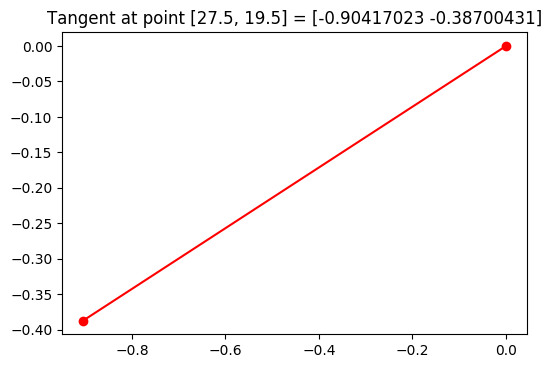

In [244]:
def tanDir(floatPos, tanArr):
    intx = int(round(floatPos[0]))
    inty = int(round(floatPos[1]))
    return tanArr[intx,inty]

point = [27.5,19.5]
plt.title("Tangent at point {} = {}".format(point, tanDir(point,tangents)))
plt.plot([0,tanDir(point,tangents)[0]], [0,tanDir(point,tangents)[1]], 'ro-')

**ii)** In the cell below, please implement Euler's method to find the curve $c$ starting in the point $\mathbf{x} = [28,20]$ and tracking for $N$ steps with step length $s$. Apply your function with $N=100$ steps and step length $s=0.5$. Plot the resulting curve together with the tangential directions. What do you see?

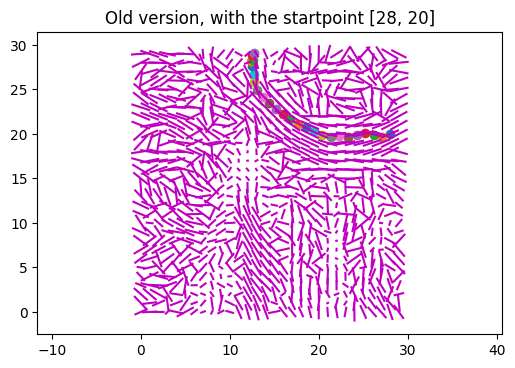

In [326]:
def euler(s, start, length, array):
    curPos = start.copy()
    retVal = [curPos]
    
    for i in range(length):
        # Checking if curPos is inside the given dataset
        if (curPos[0] < len(array)-1 and curPos[1] < len(array)-1 and curPos[0] > 0 and curPos[1] > 0):
            # Updating curPos with the tangents direction in the given point
            curPos += tanDir(curPos,array)
            retVal.append(curPos.copy())
        else:
            # Breaking out of the loop
            i = length
    return retVal

plot_tangents(tangents)
plt.axis('equal')
startPoint = [28,20]
# Plotting in a weird way because I couldn't get a proper line to work
# The output of euler is a list of vectors
plt.title("Old version, with the startpoint {}".format(startPoint))
for i in range(len(euler(0.5, startPoint,100,tangents))):
    plt.scatter(euler(0.5, startPoint,100,tangents)[i][0],euler(0.5, startPoint,100,tangents)[i][1])

**iii)** The tangential directions are only determined up to sign, see Figure 3 in the exam PDF. Hence, you need to determine whether you should use the given tangential vector, or whether you should multiply it by $-1$ before taking a step. You want to select the option that gives you the smallest change in direction. In the cell below, please describe how this might be done, make an updated implementation of Euler's method that considers this, apply and plot the resulting curve with the same parameters as in ii).

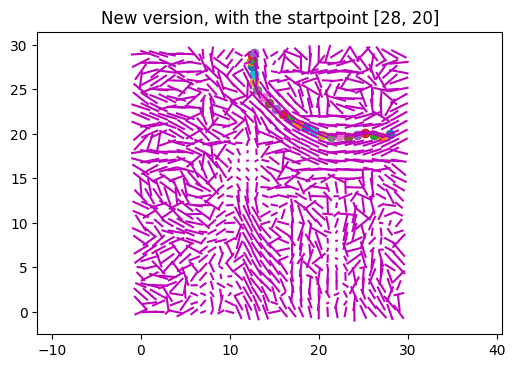

In [331]:
# The discussion part of this has been completed in the pdf document

def vectorAngle(vec1, vec2):
    # Calculating the angle between two vectors, used in function below
    cosAngle = np.dot(vec1, vec2)
    sinAngle = linalg.norm(np.cross(vec1, vec2))
    return np.arctan2(sinAngle, cosAngle)

def newEuler(s, start, length, array):
    curPos = start.copy()
    retVal = [curPos]
    wasMinus = False
    for i in range(length):
        # Checking if curPos is inside the given dataset
        if (curPos[0] < len(array)-1 and curPos[1] < len(array)-1 and curPos[0] > 0 and curPos[1] > 0):
            
            # Determining which direction next step is
            if (wasMinus):
                curVec = -tanDir(curPos.copy(),array)
            else:
                curVec = tanDir(curPos.copy(),array)
            plusVector = tanDir((curPos.copy()+curVec),array)
            minusVector = -tanDir((curPos.copy()+curVec),array)
            # Updating curPos with the tangents direction in the given point
            if (vectorAngle(curVec,plusVector) < vectorAngle(curVec,minusVector)):
                wasMinus = False
            else:
                wasMinus = True
            
            curPos += curVec
            retVal.append(curPos.copy())
        else:
            # Breaking out of the loop
            i = length +1
    return retVal

plot_tangents(tangents)
plt.axis('equal')
startPoint = [28,20]
# Plotting in a weird way because I couldn't get a proper line to work
# The output of newEuler is a list of vectors
plt.title("New version, with the startpoint {}".format(startPoint))
for i in range(len(newEuler(0.5, startPoint,100,tangents))):
    plt.scatter(newEuler(0.5, startPoint,100,tangents)[i][0],newEuler(0.5, startPoint,100,tangents)[i][1])

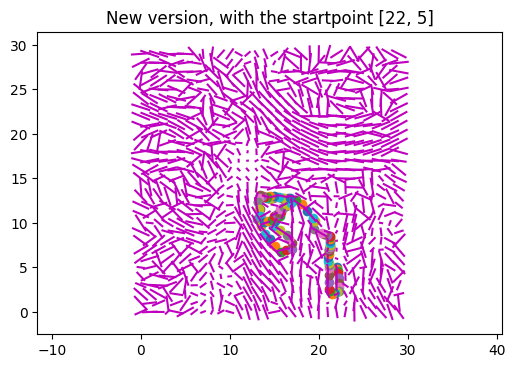

In [332]:
# Trying different start points for both functions
plot_tangents(tangents)
plt.axis('equal')
startPoint = [22,5]
# Plotting in a weird way because I couldn't get a proper line to work
# The output of newEuler is a list of vectors
plt.title("New version, with the startpoint {}".format(startPoint))
for i in range(len(newEuler(0.5, startPoint,100,tangents))):
    plt.scatter(newEuler(0.5, startPoint,100,tangents)[i][0],newEuler(0.5, startPoint,100,tangents)[i][1])

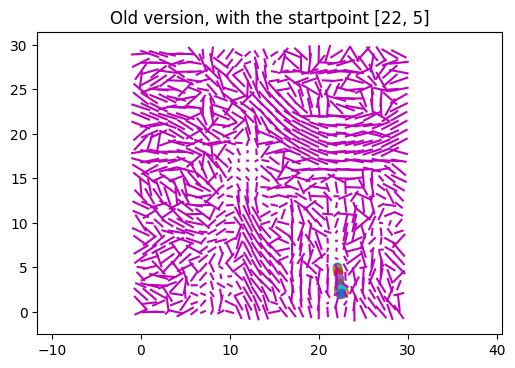

In [333]:
plot_tangents(tangents)
plt.axis('equal')
startPoint = [22,5]
# Plotting in a weird way because I couldn't get a proper line to work
# The output of newEuler is a list of vectors
plt.title("Old version, with the startpoint {}".format(startPoint))
for i in range(len(euler(0.5, startPoint,100,tangents))):
    plt.scatter(euler(0.5, startPoint,100,tangents)[i][0],euler(0.5, startPoint,100,tangents)[i][1])